#   Aparna Kalla 
## Data Science intern JUNE'21
## TASK 1: Predict the percentage of an student based on the no. of study      hours

### importing necessary modules

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Reading the data 

In [3]:
link='http://bit.ly/w-data'
df=pd.read_csv(link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### visualizing the data 

Text(0, 0.5, 'scores')

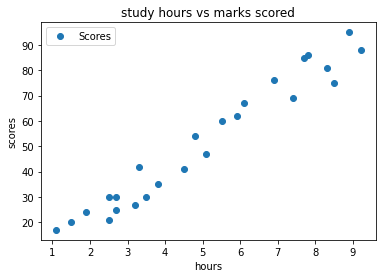

In [7]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('study hours vs marks scored')
plt.xlabel('hours')
plt.ylabel('scores')

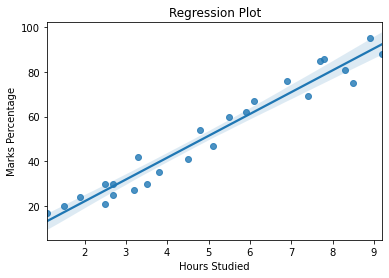

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()
print(df.corr())

## Training the model

### a) splitting the data

In [29]:
#defining x and y
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

#dividing the data
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)

### b)fitting the data into the model

In [30]:
regression=LinearRegression()
regression.fit(train_X,train_y)
print('trained')

trained


### predicting the marks 

In [31]:
pred_y= regression.predict(val_X)
prediction=pd.DataFrame({'Hours':[i[0] for i in val_X],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### comapring with actual marks

In [32]:
compare_scores=pd.DataFrame({'Actual Marks':val_y,'Predicted marks':pred_y})
compare_scores

,Actual Marks,Predicted marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


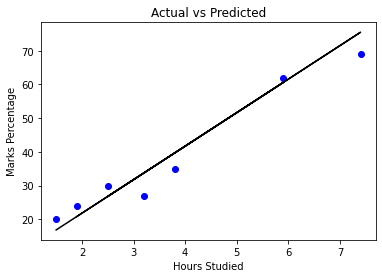

In [33]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

### evaluating the model 

In [34]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


### predicted score if student studies for 9.25 hrs/day

In [36]:
hours=[9.25]
answer=regression.predict([hours])
print('score={}'.format(answer[0],3))

score=93.89272889341655
